# <center> Pandas (part 02) <center>

<img src = 'https://github.com/saeed-saffari/alzahra-workshop-spr2021/blob/main/lecture/PIC/Pandas.png?raw=true' 
     width = "550"
     >

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1. Data Cleaning and Preparation
### 1.1 Handling Missing Data (Na, NAN)

Missing data occurs commonly in many data analysis applications. One of the goals of pandas is to make working with missing data as painless as possible. For example, all of the descriptive statistics on pandas objects exclude missing data by default.

The way that missing data is represented in pandas objects is somewhat imperfect, but it is functional for a lot of users. For numeric data, pandas uses the floating-point value ``NaN`` (`Not a Number`) to represent missing data.

In pandas, we’ve adopted a convention used in the R programming language by referring to missing data as `NA`, which stands for `not available`. In statistics applications, `NA` data may either be data that does not exist or that exists but was not observed (through problems with data collection, for example). When cleaning up data for analysis, it is often important to do analysis on the missing data itself to identify data collection problems or potential biases in the data caused by missing data.

- **NA handling methods**

|Argument | Description |
| ---     | ---         |
|dropna   |Filteaxis labels based on whether values for each label have missing data, with varying thresholds for how much missing data to tolerate. |
|fillna   | Fill in missing data with some value or using an interpolation method such as'ffill'or'bfill'. |
|isnull   | Return boolean values indicating which values are missing/NA. |
|notnull  | Negation ofisnull.|
  

In [2]:
df = pd.DataFrame({
    'col1':[1,2,3,4,np.nan],
    'col2':[np.nan,555,np.nan,444, 333],
    'col3':['abc', 'def', 'ghi', 'xyz', 'ghj'],
    'col4':['16', '23', '16', '25', '27'],
    'col5':['187', '160', np.nan, '202', '163']
})
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [3]:
df.isnull()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


In [4]:
df.isna()

,col1,col2,col3,col4,col5
0,False,True,False,False,False
1,False,False,False,False,False
2,False,True,False,False,True
3,False,False,False,False,False
4,True,False,False,False,False


In [5]:
df.notna()

,col1,col2,col3,col4,col5
0,True,False,True,True,True
1,True,True,True,True,True
2,True,False,True,True,False
3,True,True,True,True,True
4,False,True,True,True,True


The `dropna` can be helpful that returns the Series or DataFrame with only the `non-null` data and index values.   
Also you may want to drop rows or columns that are all `NA` or only those containing any `NA`s. `dropna` by default drops any row containing a missing value.

In [7]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [6]:
df.dropna()

,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
3,4.0,444.0,xyz,25,202


Passing `how='all'` will only drop rows that are all `NA`:

In [8]:
df.loc[6] = np.nan

In [9]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163
6,NaN,NaN,NaN,NaN,NaN


In [12]:
df.dropna(axis=0, how = 'all', inplace=True)

In [11]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163
6,NaN,NaN,NaN,NaN,NaN


To drop columns in the same way, pass `axis=1`:

In [13]:
df['col6'] = np.nan

In [14]:
df

,col1,col2,col3,col4,col5,col6
0,1.0,NaN,abc,16,187,NaN
1,2.0,555.0,def,23,160,NaN
2,3.0,NaN,ghi,16,NaN,NaN
3,4.0,444.0,xyz,25,202,NaN
4,NaN,333.0,ghj,27,163,NaN


In [15]:
df.dropna(axis = 1)

,col3,col4
0,abc,16
1,def,23
2,ghi,16
3,xyz,25
4,ghj,27


In [16]:
df.dropna(axis=1, how = 'all', inplace=True)

In [17]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


### 1.2 Filling In Missing Data

Rather than filtering out missing data (and potentially discarding other data along with it), you may want to fill in the “holes” in any number of ways. For most purposes, the `fillna` method is the workhorse function to use. Calling `fillna` with a constant replaces missing values with that value:

In [18]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [21]:
df.fillna(120)

,col1,col2,col3,col4,col5
0,1.0,120.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,120.0,ghi,16,120
3,4.0,444.0,xyz,25,202
4,120.0,333.0,ghj,27,163


In [22]:
df.fillna('missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,missing
3,4.0,444.0,xyz,25,202
4,missing,333.0,ghj,27,163


Calling `fillna` with a dict, you can use a different fill value for each column:

In [23]:
df.fillna({'col1':1234, 'col2':'missing'})

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,missing,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,1234.0,333.0,ghj,27,163


The same `interpolation` methods available for reindexing can be used with `fillna`:

In [24]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,NaN,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [25]:
df.fillna(method='ffill')

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_96875/1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [26]:
df.fillna(method='ffill').dropna()

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_96875/988529253.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill').dropna()


,col1,col2,col3,col4,col5
1,2.0,555.0,def,23,160
2,3.0,555.0,ghi,16,160
3,4.0,444.0,xyz,25,202
4,4.0,333.0,ghj,27,163


In [27]:
df.fillna(method='bfill')

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_96875/2831856154.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,col1,col2,col3,col4,col5
0,1.0,555.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,202
3,4.0,444.0,xyz,25,202
4,NaN,333.0,ghj,27,163


In [28]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16,187
1,2.0,555.0,def,23,160
2,3.0,444.0,ghi,16,NaN
3,4.0,444.0,xyz,25,202
4,2.5,333.0,ghj,27,163


In [32]:
df[['col4', 'col5']] = df[['col4', 'col5']].astype(float)

In [33]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [34]:
df.fillna(df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,444.0,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,444.0,ghi,16.0,178.0
3,4.0,444.0,xyz,25.0,202.0
4,2.5,333.0,ghj,27.0,163.0


In [35]:
df.interpolate()

/var/folders/nh/zzct6yyd33xgwvxjryqtkw240000gn/T/ipykernel_96875/4002874584.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,499.5,ghi,16.0,181.0
3,4.0,444.0,xyz,25.0,202.0
4,4.0,333.0,ghj,27.0,163.0


In [39]:
df.fillna('missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,missing,ghi,16.0,missing
3,4.0,444.0,xyz,25.0,202.0
4,missing,333.0,ghj,27.0,163.0


### 1.3 Removing Duplicates

Duplicate rows may be found in a DataFrame for any number of reasons. Here is an example:

In [40]:
df.loc[5] = df.loc[4]
df.loc[6] = df.loc[3]
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


The DataFrame method duplicated returns a boolean Series indicating whether each row is a duplicate (has been observed in a previous row) or not:

In [41]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

Relatedly, drop_duplicates returns a DataFrame where the duplicated array is False:

In [42]:
df.drop_duplicates()

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


In [43]:
df[df.duplicated()]

,col1,col2,col3,col4,col5
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [44]:
df[- df.duplicated()]

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


Both of these methods by default consider all of the columns; alternatively, you can specify any subset of them to detect duplicates. Suppose we had an additional column of values and wanted to filter duplicates only based on the `'col4'` column:

In [45]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,16.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [48]:
df.loc[2, 'col4'] = 23

In [49]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,23.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [50]:
df.drop_duplicates(['col4'])

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0


`duplicated` and `drop_duplicates` by default keep the first observed value combination. Passing `keep='last'` will return the last one:

In [51]:
df.drop_duplicates(['col4'], keep='last')

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
2,3.0,NaN,ghi,23.0,NaN
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


### 1.4 Replacing Values

Filling in missing data with the `fillna` method is a special case of more general value replacement. Now `replace` method provides a simpler and more flexible and general way to do so.

In [52]:
df

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,23.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [53]:
df.replace(333, 567)

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,23.0,NaN
3,4.0,444.0,xyz,25.0,202.0
4,NaN,567.0,ghj,27.0,163.0
5,NaN,567.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [54]:
df.replace(np.nan, 'missing')

,col1,col2,col3,col4,col5
0,1.0,missing,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,missing,ghi,23.0,missing
3,4.0,444.0,xyz,25.0,202.0
4,missing,333.0,ghj,27.0,163.0
5,missing,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [55]:
df.replace(np.nan, df.mean(numeric_only=True))

,col1,col2,col3,col4,col5
0,1.0,421.8,abc,16.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,421.8,ghi,23.0,179.5
3,4.0,444.0,xyz,25.0,202.0
4,2.8,333.0,ghj,27.0,163.0
5,2.8,333.0,ghj,27.0,163.0
6,4.0,444.0,xyz,25.0,202.0


In [56]:
df.replace([16, 444], [12, 'All'])

,col1,col2,col3,col4,col5
0,1.0,NaN,abc,12.0,187.0
1,2.0,555.0,def,23.0,160.0
2,3.0,NaN,ghi,23.0,NaN
3,4.0,All,xyz,25.0,202.0
4,NaN,333.0,ghj,27.0,163.0
5,NaN,333.0,ghj,27.0,163.0
6,4.0,All,xyz,25.0,202.0


## 2. Combining Datasets
### 2.1 Concat

Some of the most interesting studies of data come from combining different data sources.  
These operations can involve anything from very straightforward concatenation of two different datasets, to more complicated database-style joins and merges that correctly handle any overlaps between the datasets.
``Series`` and ``DataFrame``s are built with this type of operation in mind, and Pandas includes functions and methods that make this sort of data wrangling fast and straightforward.

Here we'll take a look at simple concatenation of ``Series`` and ``DataFrame``s with the ``pd.concat`` function; later we'll dive into more sophisticated in-memory merges and joins implemented in Pandas.

In [57]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [58]:
df1 = make_df('ABCD', range(4))
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [60]:
df2 = make_df('ABCD', range(4,8))
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [61]:
pd.concat([df1, df2], axis = 0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [62]:
pd.concat([df1, df2], axis = 1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [63]:
df3 = make_df('EFGH', range(0,4))
df3

,E,F,G,H
0,E0,F0,G0,H0
1,E1,F1,G1,H1
2,E2,F2,G2,H2
3,E3,F3,G3,H3


In [64]:
pd.concat([df1, df3], axis = 1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E0,F0,G0,H0
1,A1,B1,C1,D1,E1,F1,G1,H1
2,A2,B2,C2,D2,E2,F2,G2,H2
3,A3,B3,C3,D3,E3,F3,G3,H3


In [65]:
pd.concat([df1, df3], axis = 0)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,E0,F0,G0,H0
1,NaN,NaN,NaN,NaN,E1,F1,G1,H1
2,NaN,NaN,NaN,NaN,E2,F2,G2,H2
3,NaN,NaN,NaN,NaN,E3,F3,G3,H3


### 2.2 Merge
One essential feature offered by Pandas is its high-performance, in-memory join and merge operations.
If you have ever worked with databases, you should be familiar with this type of data interaction.
The main interface for this is the ``pd.merge`` function, and we'll see few examples of how this can work in practice.

In [66]:
left = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k3'],
    'A'  : ['A0', 'A1', 'A2', 'A3'],
    'B'  : ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({
    'key': ['k0', 'k1', 'k2', 'k4'],
    'C'  : ['C0', 'C1', 'C2', 'C4'],
    'D'  : ['D0', 'D1', 'D2', 'D4']})

In [67]:
left

,key,A,B
0,k0,A0,B0
1,k1,A1,B1
2,k2,A2,B2
3,k3,A3,B3


In [68]:
right

,key,C,D
0,k0,C0,D0
1,k1,C1,D1
2,k2,C2,D2
3,k4,C4,D4


Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [69]:
pd.merge(left, right, on='key', how='inner')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2


In [70]:
pd.merge(left, right, on='key', how='outer')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN
4,k4,NaN,NaN,C4,D4


In [71]:
pd.merge(left, right, on='key', how='left')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k3,A3,B3,NaN,NaN


In [72]:
pd.merge(left, right, on='key', how='right')

,key,A,B,C,D
0,k0,A0,B0,C0,D0
1,k1,A1,B1,C1,D1
2,k2,A2,B2,C2,D2
3,k4,NaN,NaN,C4,D4


## 3. Group by

`DataFrame.groupby()` function is used to collect the identical data into groups and perform aggregate functions on the grouped data. Group by operation involves splitting the data, applying some functions, and finally aggregating the results.

In [73]:
data = {
    'Company': ['GOOG', 'GOOG','GOOG', 'MSFT', 'MSFT', 'FB', 'FB'],
    'Person' : ['Sam', 'Charlie', 'John', 'Amy', 'Vanessa', 'Carl', 'Sarah'],
    'Sales'  : [200, 120, 236, 340, 124, 243, 350]
}

In [74]:
df = pd.DataFrame(data)
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236
3,MSFT,Amy,340
4,MSFT,Vanessa,124
5,FB,Carl,243
6,FB,Sarah,350


In [75]:
by_comp = df.groupby('Company')
by_comp

In [77]:
by_comp.mean(numeric_only=True)

,Sales
Company,
FB,296.500000
GOOG,185.333333
MSFT,232.000000


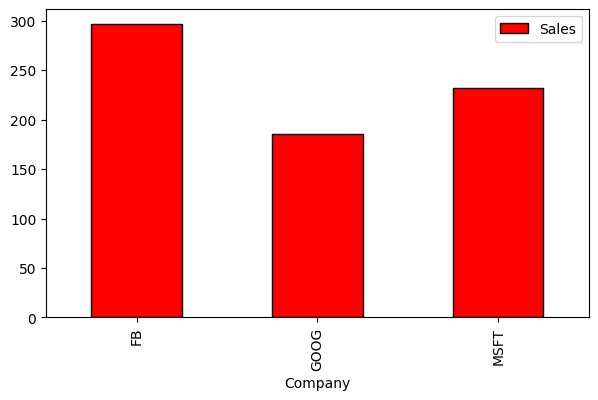

In [81]:
by_comp.mean(numeric_only=True).plot(kind = 'bar', color = 'red', figsize = (7,4), edgecolor = 'k')
plt.show()

In [82]:
by_comp.std(numeric_only=True)

,Sales
Company,
FB,75.660426
GOOG,59.374518
MSFT,152.735065


In [83]:
by_comp.max()

,Person,Sales
Company,,
FB,Sarah,350
GOOG,Sam,236
MSFT,Vanessa,340


In [84]:
by_comp.min()

,Person,Sales
Company,,
FB,Carl,243
GOOG,Charlie,120
MSFT,Amy,124


In [85]:
by_comp.count()

,Person,Sales
Company,,
FB,2,2
GOOG,3,3
MSFT,2,2


In [86]:
by_comp.agg(['count', 'min', 'max'])

Person                   Sales          
         count      min      max count  min  max
Company                                         
FB           2     Carl    Sarah     2  243  350
GOOG         3  Charlie      Sam     3  120  236
MSFT         2      Amy  Vanessa     2  124  340

In [87]:
by_comp.groups

{'FB': [5, 6], 'GOOG': [0, 1, 2], 'MSFT': [3, 4]}

In [88]:
by_comp.get_group('GOOG')

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,GOOG,John,236


In [89]:
by_comp.describe()

Sales                                                             
        count        mean         std    min     25%    50%     75%    max
Company                                                                   
FB        2.0  296.500000   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      3.0  185.333333   59.374518  120.0  160.00  200.0  218.00  236.0
MSFT      2.0  232.000000  152.735065  124.0  178.00  232.0  286.00  340.0

In [91]:
by_comp.describe().columns

MultiIndex([('Sales', 'count'),
            ('Sales',  'mean'),
            ('Sales',   'std'),
            ('Sales',   'min'),
            ('Sales',   '25%'),
            ('Sales',   '50%'),
            ('Sales',   '75%'),
            ('Sales',   'max')],
           )

In [93]:
by_comp.describe()['Sales']

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
FB,2.0,296.500000,75.660426,243.0,269.75,296.5,323.25,350.0
GOOG,3.0,185.333333,59.374518,120.0,160.00,200.0,218.00,236.0
MSFT,2.0,232.000000,152.735065,124.0,178.00,232.0,286.00,340.0


In [95]:
by_comp.describe()['Sales']['mean']

Company
FB      296.500000
GOOG    185.333333
MSFT    232.000000
Name: mean, dtype: float64

In [96]:
by_comp.describe()['Sales'][['mean', 'max','min']]

,mean,max,min
Company,,,
FB,296.500000,350.0,243.0
GOOG,185.333333,236.0,120.0
MSFT,232.000000,340.0,124.0


## Exercise 

link: [link to download data (2019)](https://insights.stackoverflow.com/survey)

In [97]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [98]:
df.shape

(88883, 85)

In [99]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [100]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [103]:
df.Country.unique()

array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia',
       'Hong Kong (S.A.R.)', 'United Arab Emirates', 'Portugal',
       'Nigeria', 'Norway', 'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico',
       'Dominican Republic', 'Guatemala', 'Chile', 'Ecuador', 'Ghana',
       'Uganda', 'Cambodia', 'Mauritius', 'Nepal', 'Singapore'

In [104]:
len(df.Country.unique())

180

In [105]:
df.Country.value_counts()

Country
United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Papua New Guinea                        1
Saint Kitts and Nevis                   1
Saint Vincent and the Grenadines        1
Sao Tome and Principe                   1
Chad                                    1
Name: count, Length: 179, dtype: int64

In [109]:
opsys = pd.DataFrame(df.OpSys.value_counts())
opsys

,count
OpSys,
Windows,41714
MacOS,23541
Linux-based,22472
BSD,124


In [111]:
opsys['count'].sum()

np.int64(87851)

In [114]:
opsys['Percentage'] = (opsys['count']/ opsys['count'].sum() * 100).round(2)
opsys

,count,Percentage
OpSys,,
Windows,41714,47.48
MacOS,23541,26.80
Linux-based,22472,25.58
BSD,124,0.14


In [117]:
df.Country.value_counts().loc['Iran']

np.int64(738)

In [118]:
country_grp = df.groupby('Country')
country_grp

In [119]:
country_grp.mean(numeric_only=True)

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Country,,,,,,
Afghanistan,47441.431818,5.418654e+07,101953.333333,55.352941,14.062500,27.913043
Albania,41695.546512,1.707424e+05,21833.700000,40.121212,5.781818,25.145833
Algeria,43010.126866,7.544398e+04,34924.047619,38.220930,6.413793,27.284404
Andorra,50079.857143,7.650000e+04,160931.000000,42.000000,2.500000,28.000000
Angola,50569.400000,2.020000e+05,7764.000000,45.000000,10.000000,26.666667
...,...,...,...,...,...,...
"Venezuela, Bolivarian Republic of...",43461.170455,1.174443e+05,14581.627907,40.444444,6.717949,28.301205
Viet Nam,43895.337662,2.613438e+07,17233.436782,44.602679,8.407767,26.739884
Yemen,45331.157895,1.375000e+05,16909.166667,41.250000,12.800000,28.117647


In [121]:
country_grp.mean(numeric_only=True).loc['Iran', ['WorkWeekHrs', 'CodeRevHrs', 'Age']]

WorkWeekHrs    46.677824
CodeRevHrs      7.452756
Age            27.596505
Name: Iran, dtype: float64

In [123]:
country_grp.get_group('Iran').head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
161,163,I am a developer by profession,No,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,NaN,Industry news about technologies you're intere...,32.0,Woman,No,Straight / Heterosexual,Middle Eastern,Yes,Too long,Difficult
443,445,I am a developer by profession,No,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,31.0,Woman,No,NaN,South Asian,Yes,Too long,Easy
565,568,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Somewhat more welcome now than last year,Courses on technologies you're interested in,22.0,Man,No,Straight / Heterosexual,Middle Eastern,No,Too long,Neither easy nor difficult
612,615,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Middle Eastern,No,Too long,Neither easy nor difficult
616,619,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,Middle Eastern,Yes,Too long,Easy


In [124]:
df.Country == 'Iran'

0        False
1        False
2        False
3        False
4        False
         ...  
88878    False
88879    False
88880    False
88881    False
88882    False
Name: Country, Length: 88883, dtype: bool

In [125]:
df[df.Country == 'Iran'].head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
161,163,I am a developer by profession,No,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,NaN,Industry news about technologies you're intere...,32.0,Woman,No,Straight / Heterosexual,Middle Eastern,Yes,Too long,Difficult
443,445,I am a developer by profession,No,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,31.0,Woman,No,NaN,South Asian,Yes,Too long,Easy
565,568,I am a developer by profession,No,Less than once per year,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Information systems, information technology, o...",...,Somewhat more welcome now than last year,Courses on technologies you're interested in,22.0,Man,No,Straight / Heterosexual,Middle Eastern,No,Too long,Neither easy nor difficult
612,615,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Middle Eastern,No,Too long,Neither easy nor difficult
616,619,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Iran,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,Middle Eastern,Yes,Too long,Easy


In [127]:
df[df.Country == 'Iran']['SocialMedia'].unique()

array(['Instagram', 'WhatsApp', nan, 'Twitter', 'YouTube', 'Reddit',
       'LinkedIn', 'Facebook', "I don't use social media"], dtype=object)

In [128]:
df[df.Country == 'Iran']['SocialMedia'].value_counts()

SocialMedia
Instagram                   174
Twitter                     115
YouTube                      86
LinkedIn                     61
WhatsApp                     56
I don't use social media     25
Reddit                       12
Facebook                      9
Name: count, dtype: int64

In [130]:
country_grp['SocialMedia'].value_counts().loc["Iran"]

SocialMedia
Instagram                   174
Twitter                     115
YouTube                      86
LinkedIn                     61
WhatsApp                     56
I don't use social media     25
Reddit                       12
Facebook                      9
Name: count, dtype: int64

In [131]:
country_grp['SocialMedia'].value_counts().loc["China"]

SocialMedia
WeChat 微信                   403
YouTube                      53
Weibo 新浪微博                   42
I don't use social media     27
Twitter                      27
Reddit                       12
LinkedIn                     11
Facebook                      8
Instagram                     7
Youku Tudou 优酷                7
WhatsApp                      3
VK ВКонта́кте                 1
Name: count, dtype: int64

In [132]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [133]:
df['LanguageWorkedWith']

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [136]:
df[df.Country=='Iran']['LanguageWorkedWith'].head(20)

161                  C#;HTML/CSS;JavaScript;SQL;Other(s):
443                                                C#;SQL
565         C++;C#;Clojure;HTML/CSS;JavaScript;Python;SQL
612      C#;HTML/CSS;JavaScript;Python;SQL;TypeScript;VBA
616     Assembly;Bash/Shell/PowerShell;C;C++;C#;HTML/C...
900     Assembly;Bash/Shell/PowerShell;C;C++;HTML/CSS;...
1006                  Dart;Java;Kotlin;Python;Scala;Swift
1050    C#;HTML/CSS;JavaScript;Kotlin;SQL;Swift;TypeSc...
1061               C#;HTML/CSS;Java;JavaScript;TypeScript
1111                                HTML/CSS;Java;PHP;SQL
1142    C#;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript
1149             Assembly;Bash/Shell/PowerShell;Go;Python
1412                         C++;C#;JavaScript;TypeScript
1508                                               Python
1788     Assembly;Bash/Shell/PowerShell;JavaScript;Python
1939        Assembly;C++;HTML/CSS;Java;JavaScript;PHP;SQL
2249    C;C++;HTML/CSS;Java;JavaScript;PHP;R;SQL;TypeS...
2258          

In [138]:
True + False

1

In [140]:
df[df.Country=='Iran']['LanguageWorkedWith'].str.contains('Python').sum()

268

In [141]:
for i in ['Python', 'R', 'JavaScript', 'HTML', 'C', 'SQL', 'PHP']:
    print("NUmber of users in {} is: ".format(i))
    print(df[df.Country=='Iran']['LanguageWorkedWith'].str.contains(i).sum())
    print("")

NUmber of users in Python is: 
268

NUmber of users in R is: 
51

NUmber of users in JavaScript is: 
469

NUmber of users in HTML is: 
442

NUmber of users in C is: 
599

NUmber of users in SQL is: 
389

NUmber of users in PHP is: 
249



In [143]:
py_count = pd.DataFrame(index=df.Country.unique(), columns=['Python_users'], dtype=float)
py_count.head()

,Python_users
United Kingdom,NaN
Bosnia and Herzegovina,NaN
Thailand,NaN
United States,NaN
Ukraine,NaN


In [144]:
for i in df.Country.unique():
    value = df[df.Country==i]['LanguageWorkedWith'].str.contains('Python').sum()
    py_count.loc[i]=value

In [145]:
py_count.head()

,Python_users
United Kingdom,2384.0
Bosnia and Herzegovina,29.0
Thailand,92.0
United States,10083.0
Ukraine,246.0


In [147]:
py_count.Python_users.max()

np.float64(10083.0)

In [148]:
py_count[py_count.Python_users==py_count.Python_users.max()]

,Python_users
United States,10083.0


In [149]:
py_count.nlargest(1, 'Python_users')

,Python_users
United States,10083.0


In [151]:
py_count.sort_values('Python_users', ascending=False)

,Python_users
United States,10083.0
India,3105.0
Germany,2451.0
United Kingdom,2384.0
Canada,1558.0
...,...
Malawi,0.0
Saint Vincent and the Grenadines,0.0
Liberia,0.0
Chad,0.0


In [152]:
py_count = pd.DataFrame(index=df.Country.unique(), columns=['Python', 'R', 'JavaScript', 'HTML', 'C', 'SQL', 'PHP'], dtype=float)
py_count.head()

,Python,R,JavaScript,HTML,C,SQL,PHP
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thailand,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
py_count.columns

Index(['Python', 'R', 'JavaScript', 'HTML', 'C', 'SQL', 'PHP'], dtype='object')

In [154]:
for i in df.Country.unique():
    for j in py_count.columns:
        value = df[df.Country==i]['LanguageWorkedWith'].str.contains(j).sum()
        py_count.loc[i,j] = value

In [158]:
py_count.nlargest(3, "R")

,Python,R,JavaScript,HTML,C,SQL,PHP
United States,10083.0,4644.0,14672.0,13488.0,17348.0,11829.0,3970.0
Germany,2451.0,951.0,3577.0,3446.0,4710.0,2920.0,1603.0
United Kingdom,2384.0,935.0,3946.0,3722.0,4774.0,3147.0,1308.0


In [159]:
for i in py_count.columns:
    print(i)
    print(py_count.nlargest(3, i))
    print("")
    print("")

Python
                Python       R  JavaScript     HTML        C      SQL     PHP
United States  10083.0  4644.0     14672.0  13488.0  17348.0  11829.0  3970.0
India           3105.0   812.0      5697.0   5514.0   7040.0   4429.0  2565.0
Germany         2451.0   951.0      3577.0   3446.0   4710.0   2920.0  1603.0


R
                 Python       R  JavaScript     HTML        C      SQL     PHP
United States   10083.0  4644.0     14672.0  13488.0  17348.0  11829.0  3970.0
Germany          2451.0   951.0      3577.0   3446.0   4710.0   2920.0  1603.0
United Kingdom   2384.0   935.0      3946.0   3722.0   4774.0   3147.0  1308.0


JavaScript
                 Python       R  JavaScript     HTML        C      SQL     PHP
United States   10083.0  4644.0     14672.0  13488.0  17348.0  11829.0  3970.0
India            3105.0   812.0      5697.0   5514.0   7040.0   4429.0  2565.0
United Kingdom   2384.0   935.0      3946.0   3722.0   4774.0   3147.0  1308.0


HTML
                 Python  